# DATA 271 Practice Midterm 2

In this practice midterm, we will perform an exploratory data analysis on a rollercoaster dataset. Follow the steps below to perform your EDA.

The actual midterm will also involve an exploratory data analysis. 

**Problem 0:** Import the required modules for this EDA. You will need, Numpy, Pandas, Matplotlib, Seaborn, and re. Feel free to use this cell to set the style and/or runtime configuration parameters for your Seaborn plots if you want to.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

## 1. Import the data and begin exploration

**Problem 1.1:** Import the `rollercoasters.csv` file (already in your working directory) as a Pandas DataFrame. 

In [2]:
df = pd.read_csv("rollercoasters.csv")

**Problem 1.2:** How many rows and columns are in your dataframe?

In [3]:
num_rows = df.shape[0]
num_cols = df.shape[1]
num_rows, num_cols

(1087, 43)

**Problem 1.3**: Begin with an initial inspection of your dataframe. What are the column names? How many null values are in each column? What is the datatype of each column? 

*HINT* Feel free to use a single Pandas method get this information, or use several if you prefer that.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Type                           1087 non-null   object 
 6   Manufacturer                   1028 non-null   object 
 7   Model                          744 non-null    object 
 8   Height                         965 non-null    object 
 9   Inversions                     932 non-null    float64
 10  Lift/launch system             795 non-null    object 
 11  Cost                           382 non-null    object 
 12  Trains                         718 non-null    o

## 2. Begin Data Cleaning

**Problem 2.1**: The current column names are not in a standardized format. Rename the columns so they are all in the form `lowercase_with_underscores`. 

*HINT:* When you are done, there should not be any special characters such as dashes or slashes. 

In [6]:
df.columns = df.columns.str.replace('[\s\W]','_',regex=True).str.lower()

**Problem 2.2:** Create a copy of your dataframe called `df_copy`, so that the original data will be accessible even after we make changes. 

In [7]:
df_copy = df.copy()

**Problem 2.3:** Some columns have many null values. Drop all the columns from the dataframe `df` that have more than 250 null values. 

In [11]:
df = df.drop(columns = df.columns[df.isna().sum() > 250])
df

,coaster_name,length,speed,location,status,type,manufacturer,height,inversions,year_introduced,type_main,opening_date
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,Wood,LaMarcus Adna Thompson,50 ft (15 m),NaN,1884,Wood,1884-06-16
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,Wood,Lina Beecher,NaN,1.0,1895,Wood,1895-01-01
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,Other,NaN,NaN,NaN,1896,Other,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,Steel,Edwin Prescott,NaN,1.0,1901,Steel,1901-01-01
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,Steel,Edwin Prescott,NaN,1.0,1901,Steel,1901-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,Steel,Anton Schwarzkopf,111 ft (34 m),3.0,2022,Steel,NaN
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,Steel – Launched,Intamin,178 ft (54 m),2.0,2022,Steel,2022-01-01
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,Steel – Launched,Vekoma,78.1 ft (23.8 m),0.0,2022,Steel,2016-06-16
1085,Tumbili,770 ft (230 m),34 mph (55 km/h),Kings Dominion,Under construction,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,112 ft (34 m),0.0,2022,Steel,NaN


**Problem 2.4** How many columns are left in the dataframe after dropping the columns with more than 250 null values?

In [12]:
new_num_cols = df.shape[1]
new_num_cols

12

**Problem 2.5** Visualize the number of null values in each column with a heatmap.

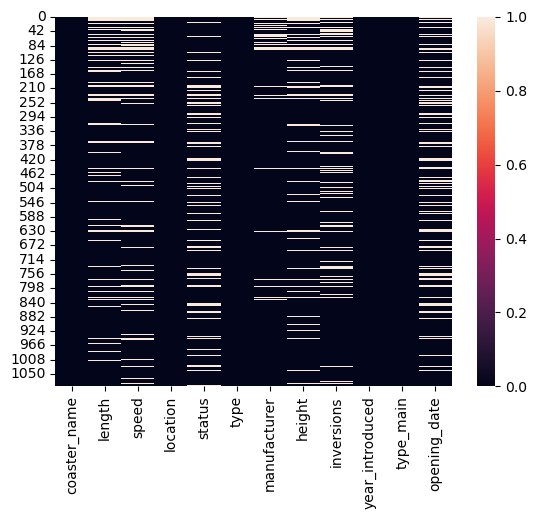

In [14]:
sns.heatmap(df.isna())
plt.show()

**Problem 2.6** Inpsect the `height` column of the dataset. We want to extract the height in feet (ft) from the column. Create a new column called `height_ft` in your `df` DataFrame containing the heights in feet. Do not convert any data types; leave them as strings.

*HINT:* You may want to use regular expression for this problem. Note that some of the heights are shown in whole numbers and some of them include digits past a decimal. Be sure to include decimals if they are available. Any NaNs should remain NaN in your new column.

In [15]:
# inspect height column
df.height

0           50 ft (15 m)
1                    NaN
2                    NaN
3                    NaN
4                    NaN
              ...       
1082       111 ft (34 m)
1083       178 ft (54 m)
1084    78.1 ft (23.8 m)
1085       112 ft (34 m)
1086       131 ft (40 m)
Name: height, Length: 1087, dtype: object

In [22]:
[re.findall('([\d.]+).+ft', df.height[i])[0] if not df.height.isna()[i] else np.nan for i in range(len(df))]

['50',
 nan,
 nan,
 nan,
 nan,
 '40',
 '41',
 nan,
 '60',
 nan,
 nan,
 nan,
 nan,
 '72.5',
 nan,
 '16',
 '70',
 nan,
 nan,
 nan,
 '98',
 '50',
 '40',
 '75',
 '40',
 '18.9',
 '65',
 nan,
 '64.75',
 '70',
 '70',
 nan,
 '80',
 '65',
 '100',
 '70',
 '26',
 '86',
 '92',
 '96',
 '60',
 '71',
 '85',
 '96',
 nan,
 nan,
 '72.5',
 '85',
 '60',
 '92',
 '32',
 '24',
 nan,
 '19.8',
 '70',
 '61',
 '15',
 '52',
 '62',
 '77',
 nan,
 '77',
 '27',
 '80',
 '70',
 '110',
 '70',
 '84',
 '65',
 nan,
 '28',
 '15',
 '37',
 '24',
 nan,
 '18',
 '37',
 nan,
 '50',
 '75',
 '80',
 nan,
 '78',
 nan,
 '110',
 '40',
 '35',
 '75',
 '70',
 '37',
 nan,
 '70',
 '48',
 nan,
 '20',
 '28',
 nan,
 '44.3',
 nan,
 '70',
 '10',
 '32',
 '88',
 nan,
 '56',
 '88',
 '56',
 '38.6',
 '45',
 '43',
 '105',
 '44.3',
 nan,
 '4.57',
 nan,
 '35',
 '43',
 '72',
 nan,
 '85',
 nan,
 '40',
 '90',
 '70',
 '16',
 '85',
 '102',
 '70',
 nan,
 '70',
 '44.3',
 '56',
 '9',
 nan,
 '72',
 '113',
 '110',
 '93',
 '93',
 '70',
 '95',
 '56',
 nan,
 '75',
 

In [21]:
df['height_ft'] = [re.findall('([\d.]+).+ft', df.height[i])[0] if not df.height.isna()[i] else np.nan for i in range(len(df))]

**Problem 2.7** Inpsect the `speed` column of the dataset. We want to extract the speed in miles per hour (mph) from the column. Create a new column called `speed_mph` in your `df` DataFrame containing the speed in miles per hour. Do not convert any data types; leave them as strings.

HINT: You may want to use regular expression for this problem.

In [23]:
df['speed_mph'] = [re.findall('([\d.]+).+mph', df.speed[i])[0] if not df.speed.isna()[i] else np.nan for i in range(len(df))]

In [24]:
df

,coaster_name,length,speed,location,status,type,manufacturer,height,inversions,year_introduced,type_main,opening_date,height_ft,speed_mph
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,Wood,LaMarcus Adna Thompson,50 ft (15 m),NaN,1884,Wood,1884-06-16,50,6
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,Wood,Lina Beecher,NaN,1.0,1895,Wood,1895-01-01,NaN,NaN
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,Other,NaN,NaN,NaN,1896,Other,NaN,NaN,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,Steel,Edwin Prescott,NaN,1.0,1901,Steel,1901-01-01,NaN,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,Steel,Edwin Prescott,NaN,1.0,1901,Steel,1901-01-01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,Steel,Anton Schwarzkopf,111 ft (34 m),3.0,2022,Steel,NaN,111,53
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,Steel – Launched,Intamin,178 ft (54 m),2.0,2022,Steel,2022-01-01,178,73
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,Steel – Launched,Vekoma,78.1 ft (23.8 m),0.0,2022,Steel,2016-06-16,78.1,59.3
1085,Tumbili,770 ft (230 m),34 mph (55 km/h),Kings Dominion,Under construction,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,112 ft (34 m),0.0,2022,Steel,NaN,112,34


**Problem 2.8** Inpsect the `length` column of the dataset. We want to extract the length in feet (ft_ from the column. Create a new column called `length_ft` in your `df` DataFrame containing the length in feet. Do not convert any data types; leave them as strings.

HINT: You may want to use regular expression for this problem. Note that some of the lengths include a comma. You will need to account for that in your regular expression, but do not include the comma in your final `length_ft` column. 

In [31]:
df['length_ft'] = [re.findall('([\d,]+).+ft', df.length[i])[0] if not df.length.isna()[i] else np.nan for i in range(len(df))]

In [37]:
df['length_ft'] = df.length_ft.str.replace(',','')

In [38]:
df

,coaster_name,length,speed,location,status,type,manufacturer,height,inversions,year_introduced,type_main,opening_date,height_ft,speed_mph,length_ft
0,Switchback Railway,600,6 mph (9.7 km/h),Coney Island,Removed,Wood,LaMarcus Adna Thompson,50 ft (15 m),NaN,1884,Wood,1884-06-16,50,6,600
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,Wood,Lina Beecher,NaN,1.0,1895,Wood,1895-01-01,NaN,NaN,NaN
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,Other,NaN,NaN,NaN,1896,Other,NaN,NaN,NaN,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,Steel,Edwin Prescott,NaN,1.0,1901,Steel,1901-01-01,NaN,NaN,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,Steel,Edwin Prescott,NaN,1.0,1901,Steel,1901-01-01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,3444,53 mph (85 km/h),Other,NaN,Steel,Anton Schwarzkopf,111 ft (34 m),3.0,2022,Steel,NaN,111,53,3444
1083,Pantheon (roller coaster),3328,73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,Steel – Launched,Intamin,178 ft (54 m),2.0,2022,Steel,2022-01-01,178,73,3328
1084,Tron Lightcycle Power Run,3169,59.3[1] mph (95.4 km/h),Other,NaN,Steel – Launched,Vekoma,78.1 ft (23.8 m),0.0,2022,Steel,2016-06-16,78.1,59.3,3169
1085,Tumbili,770,34 mph (55 km/h),Kings Dominion,Under construction,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,112 ft (34 m),0.0,2022,Steel,NaN,112,34,770


**Problem 2.9** Are there any duplicates in the `coaster_name` column? If there are, remove any rows that have a duplicate `coaster_name` column.

In [28]:
num_duplicate_coasters = df.coaster_name.duplicated().sum()
num_duplicate_coasters

97

In [30]:
# drop duplicate coaster names
df.drop_duplicates(subset='coaster_name',inplace=True)

(990, 15)

In [ ]:
df.drop_duplicates?

**Problem 2.10** Use a Pandas method to get summary statistics for each numeric variable in the dataset.

In [39]:
df.describe()

,inversions,year_introduced
count,932.000000,1087.000000
mean,1.547210,1994.986201
std,2.114073,23.475248
min,0.000000,1884.000000
25%,0.000000,1989.000000
50%,0.000000,2000.000000
75%,3.000000,2010.000000
max,14.000000,2022.000000


## 3. Visualize

**Problem 3.1** In the following three cells, there is a problem with the data visualizations identify what the problems are and make the necessary changes to the data to get the proper plots. 

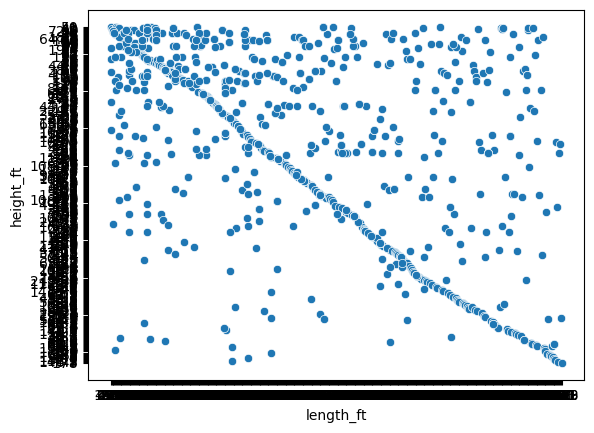

In [40]:
# Visualize the relationship between length and height of rollercoasters
sns.scatterplot(data = df, x = 'length_ft',y='height_ft')
plt.show()

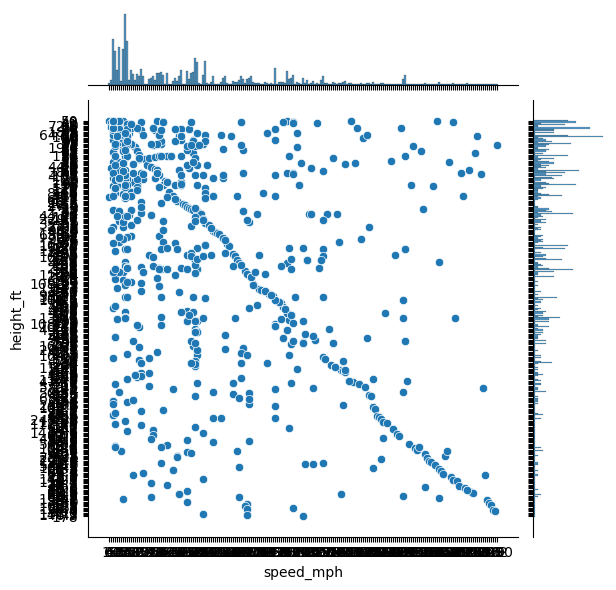

In [41]:
# Visualize the relationship between speed and height of rollercoasters and their distributions
sns.jointplot(data = df, x = 'speed_mph',y='height_ft')
plt.show()

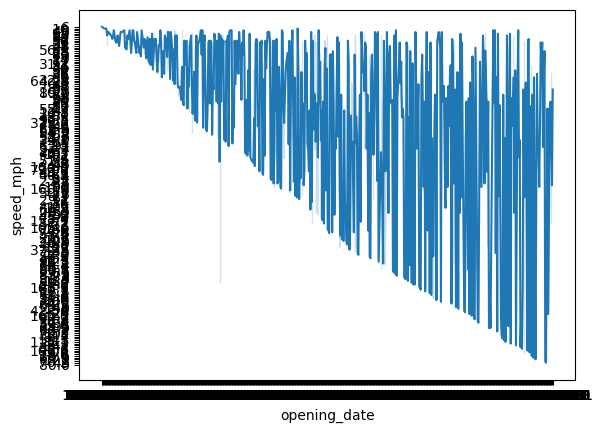

In [42]:
# Visualize the trend in speed of rollercoasters over time
sns.lineplot(data = df, x = 'opening_date',y = 'speed_mph')
plt.show()

In [43]:
# Make necessary changes here
df = df.assign(height_ft = df.height_ft.astype(float),
              length_ft = df.length_ft.astype(float),
              speed_mph = df.speed_mph.astype(float))
df.dtypes

coaster_name        object
length              object
speed               object
location            object
status              object
type                object
manufacturer        object
height              object
inversions         float64
year_introduced      int64
type_main           object
opening_date        object
height_ft          float64
speed_mph          float64
length_ft          float64
dtype: object

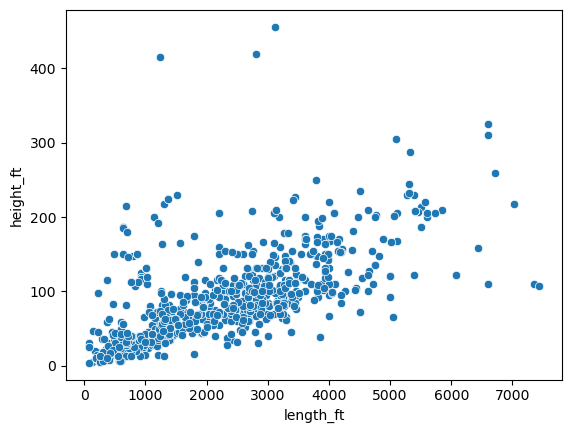

In [44]:
# REDO: Visualize the relationship between length and height of rollercoasters
sns.scatterplot(data = df, x = 'length_ft',y='height_ft')
plt.show()

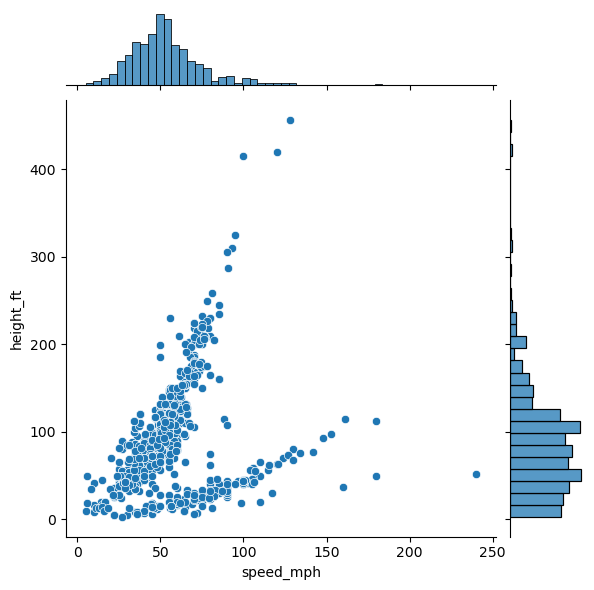

In [45]:
# REDO: Visualize the relationship between speed and height of rollercoasters and their distributions
sns.jointplot(data = df, x = 'speed_mph',y='height_ft')
plt.show()

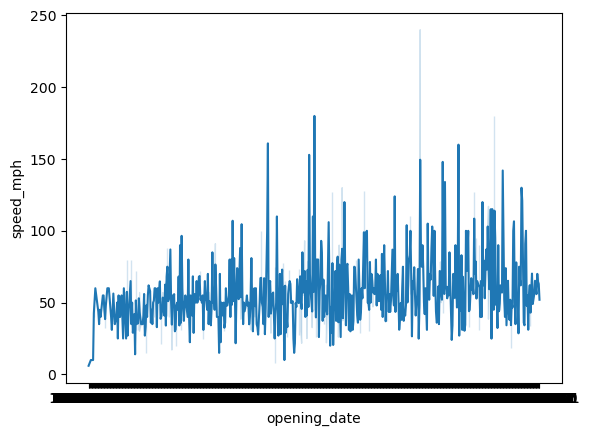

In [46]:
# REDO: Visualize the trend in speed of rollercoasters over time
sns.lineplot(data = df, x = 'opening_date',y = 'speed_mph')
plt.show()

**Problem 3.2** The plot above showing the trend in speed vs time is a little messy. Let's look at the general relationship instead. Plot the relationship between `speed_mph` and `year_intoduced` (points) and show a regression line. Is it a positive correlation or a negative correlation? 

<Axes: xlabel='year_introduced', ylabel='speed_mph'>

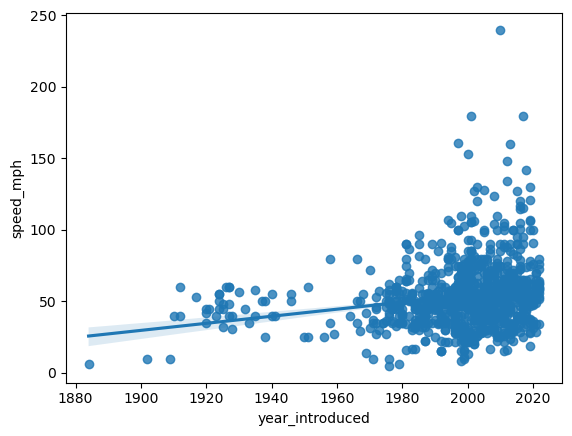

In [47]:
sns.regplot(data = df, x = 'year_introduced', y = 'speed_mph')

*Type your answer replacing this text.*

**Problem 3.3** Plot the correlation between all the numeric variables with a heatmap. (Be sure to annotate your heatmap with the correlation coefficients). Comment on what you see.

<Axes: >

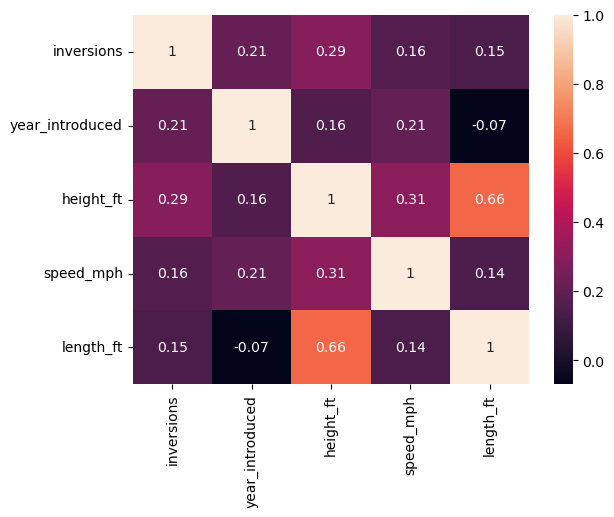

In [48]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

*Type your answer replacing this text.*

**Problem 3.4:** Visualize the relationship between the numeric variables with a Seaborn pairpplot. Comment on what you see.

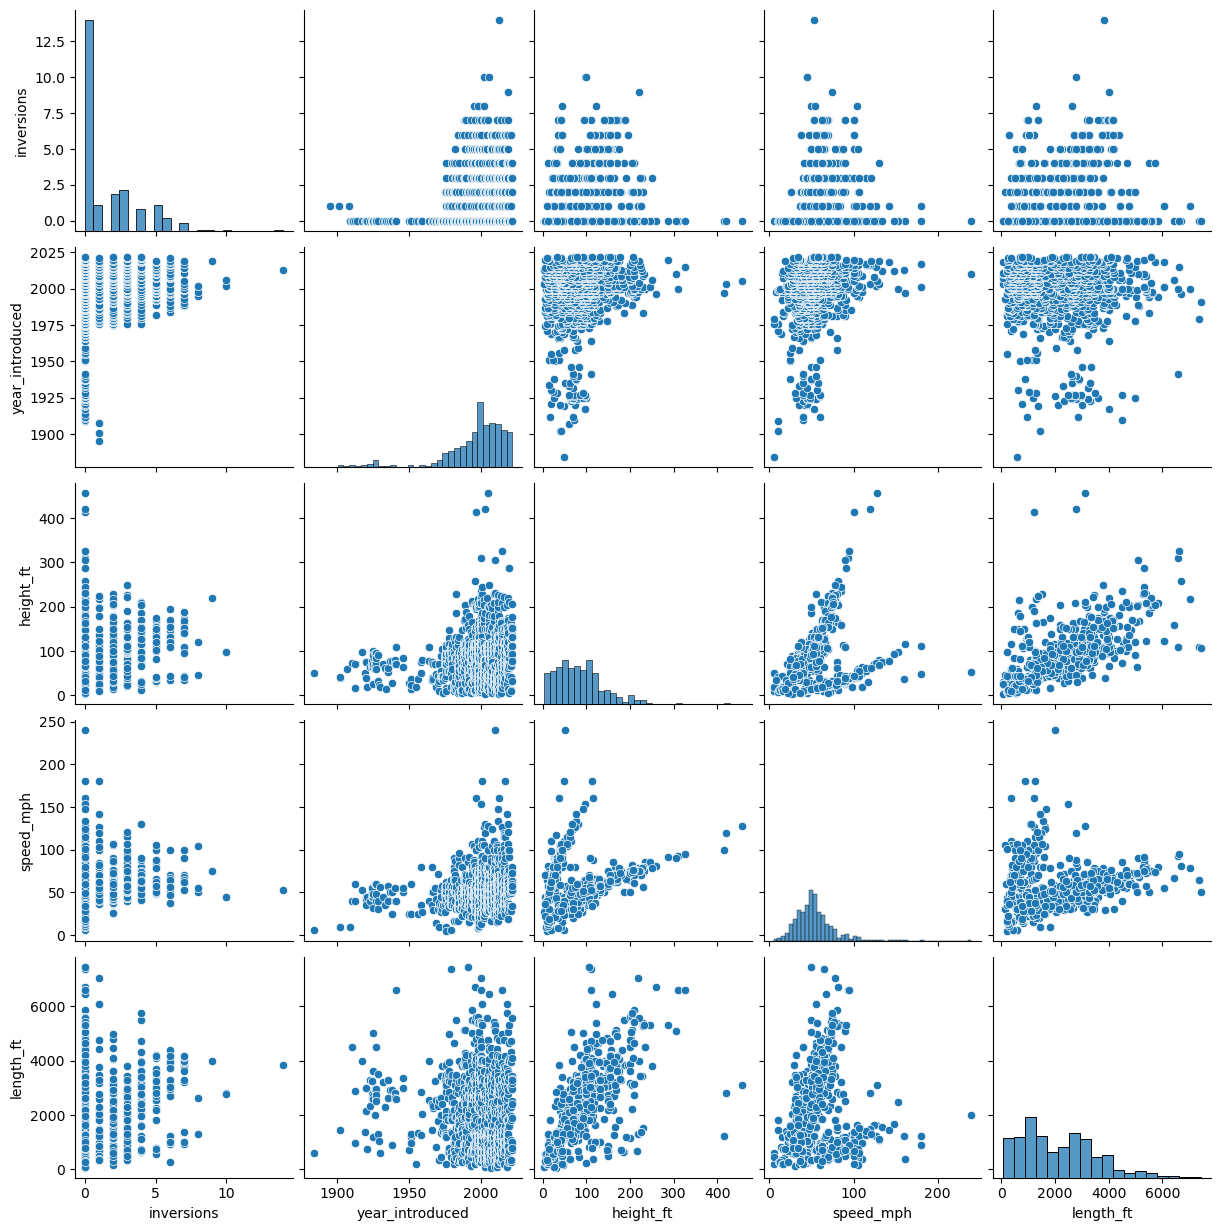

In [49]:
sns.pairplot(data = df)

*Type your answer replacing this text.*

**Problem 3.5** Visualize the number of rollercoasters of each `type_main`. What is the most common type of rollercoaster?

<Axes: xlabel='type_main', ylabel='count'>

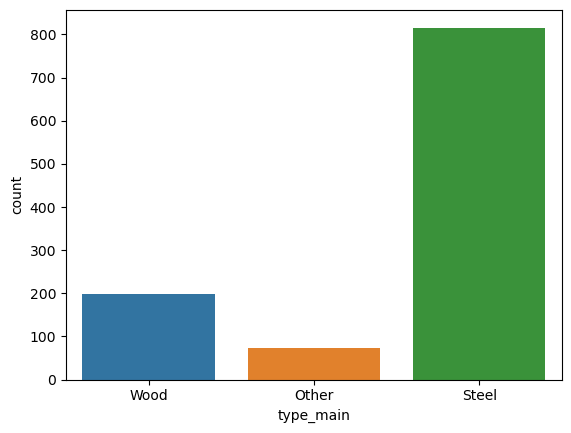

In [51]:
sns.countplot(data = df, x ='type_main')

*Type your answer replacing this text.*

**Problem 3.5** Visualize the distribution of rollercoaster speeds (mph). 

<Axes: xlabel='speed_mph', ylabel='Count'>

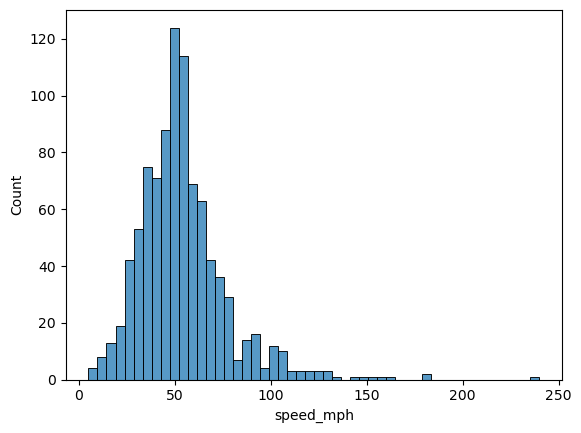

In [52]:
sns.histplot(data = df, x = 'speed_mph')

**Problem 3.6:** Visualize the smoothed distribution (KDE) of rollercoaster speeds (mph) for each `type_main` (either map it to color or facet by it). Are there any major differences in speed distributions across rollercoaster type?

<Axes: xlabel='speed_mph', ylabel='Density'>

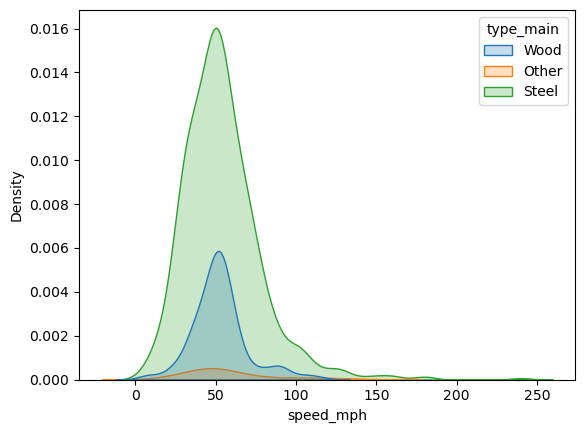

In [54]:
sns.kdeplot(data = df, x = 'speed_mph', hue = 'type_main',fill=True)

*Type your answer replacing this text.*

**Problem 3.7:** Visualize the smoothed distribution of rollercoaster speeds (mph) for each `type_main` AND the 5 number summary (min, 1st quartile, median, 3rd quartile, max).

*HINT:* Which type of plot is a combination of a boxplot and a KDE? 

<Axes: xlabel='type_main', ylabel='speed_mph'>

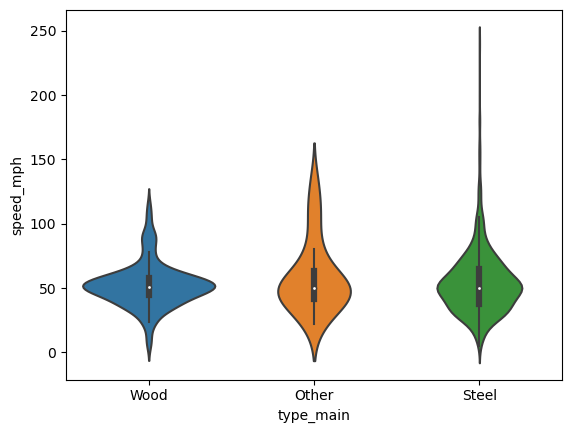

In [55]:
sns.violinplot(data = df, x = 'type_main',y = 'speed_mph')

**Problem 3.7:** Create a data visualization to determine if there are any outliers in the numeric variables. Which variables have outliers?

<Axes: >

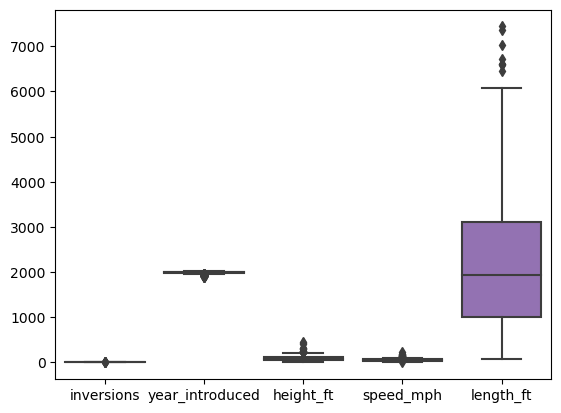

In [56]:
sns.boxplot(data = df)

*Type your answer replacing this text.*

**Problem 3.8** Sort your data frame from fastest rollercoaster to slowest roller coaster. Then create a visualization showing the speed and the rollarcoaster name of the fastest 20 rollercoasters in the dataset. 

In [57]:
df_sorted = df.sort_values(by = 'speed_mph',ascending=False)
df_sorted

,coaster_name,length,speed,location,status,type,manufacturer,height,inversions,year_introduced,type_main,opening_date,height_ft,speed_mph,length_ft
812,Formula Rossa,2000,240 km/h (149.1 mph),Ferrari World Abu Dhabi,Operating,Steel – Launched,Intamin,52 m (170.6 ft),0.0,2010,Steel,2010-11-04,52.0,240.0,2000.0
569,Do-Dodonpa,1244,180 km/h (110 mph),Fuji-Q Highland,Closed,Steel,S&S – Sansei Technologies,49 m (161 ft),1.0,2001,Steel,2001-12-21,49.0,180.0,1244.0
993,Red Force (roller coaster),880,180 km/h (112 mph),Ferrari Land,Operating,Steel – Launched,Intamin,112 m (367 ft),0.0,2017,Steel,2017-04-07,112.0,180.0,880.0
431,Tower of Terror II,376,160.9 km/h (100.0 mph),Dreamworld,Removed,Steel – Launched – Shuttle,Intamin,115 m (377 ft),0.0,1997,Steel,1997-01-23,115.0,160.9,376.0
903,Ring Racer,1212,160.0 km/h (99.4 mph),Nürburgring,Closed,Steel – Launched,S&S - Sansei Technologies,37.5 m (123 ft),NaN,2013,Steel,2013-10-31,37.5,160.0,1212.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,262,NaN,Six Flags Great Adventure,Operating,Steel – Kiddie,Zamperla,13 ft (4.0 m),0.0,2021,Steel,1999-01-01,13.0,NaN,262.0
1064,Little Dipper (Conneaut Lake Park),NaN,NaN,Conneaut Lake Park,Operating,Steel,Allan Herschell Company,NaN,NaN,2021,Steel,1950-01-01,NaN,NaN,NaN
1065,Looping Star (Clacton Pier),365,NaN,Clacton Pier,Operating,Steel,Pinfari,11 m (36 ft),1.0,2021,Steel,2021-10-23,11.0,NaN,365.0
1068,Storm Chaser (Paultons Park),NaN,NaN,Paultons Park,Operating,Steel – Spinning,Mack Rides,65.6 ft (20.0 m),0.0,2021,Steel,2021-04-12,65.6,NaN,NaN


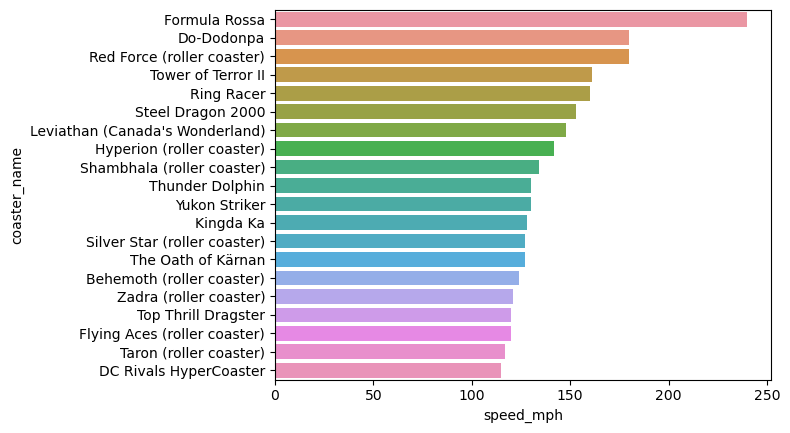

In [58]:
# Visualization here
sns.barplot(data = df_sorted[:20], x='speed_mph', y = 'coaster_name')
plt.show()

**Problem 3.9:** Use pandas methods and data visualization to show how many rollercoasters were introduced in each year.

In [59]:
# Pandas methods
df.year_introduced.value_counts()

year_introduced
1999    49
2000    47
1998    32
2011    31
2001    30
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: count, Length: 101, dtype: int64

<Axes: xlabel='year_introduced', ylabel='count'>

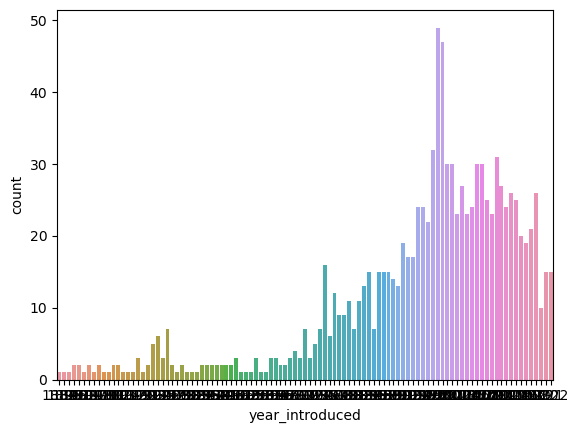

In [60]:
# Visualization
sns.countplot(data = df, x = 'year_introduced')

**Problem 3.10:** Create 3 subplots showing the relationships of speed vs year introduced, speed vs height, and speed vs length.

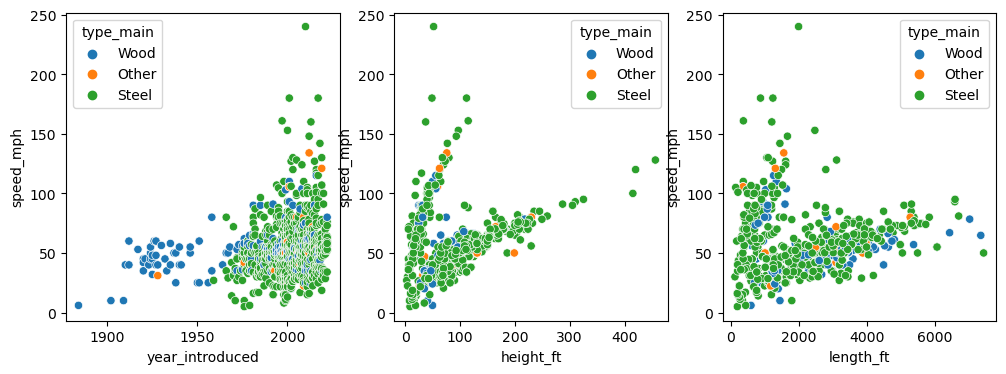

In [61]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
sns.scatterplot(data = df, x = 'year_introduced',y = 'speed_mph',ax=ax[0],hue='type_main')
sns.scatterplot(data = df, x = 'height_ft',y = 'speed_mph',ax=ax[1],hue='type_main')
sns.scatterplot(data = df, x = 'length_ft',y = 'speed_mph',ax=ax[2],hue='type_main')
plt.show()

## 4. Your exploration

**Problem 4.1** Create a question about this dataset and use a data visualization to begin answering this question. Explain your thought process. 